# Summarizing cross-section metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [26]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [129]:
ss,u = me.importStillsSummary()

In [4]:
sims,usim = plainIm(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\openfoam\summaries\viscositysweep\summaryTable_x_5_t_2.5.csv', ic=0)

In [185]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

### cross-section

### aspect ratio

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dddbe2a788>)

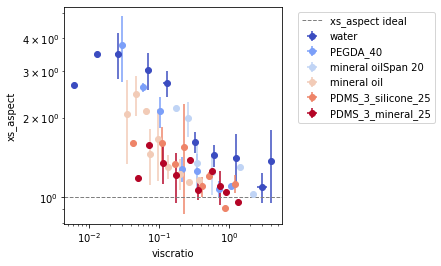

In [869]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
mp.scatterSS(ss1, 'viscratio', 'xs_aspect', 'ink_type', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9647c9f88>)

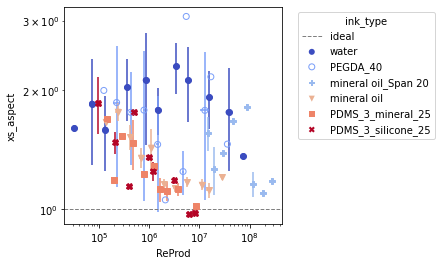

In [95]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
mp.scatterSS(ss1, 'ReProd', 'xs_aspect', 'ink_type', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12477cc69c8>)

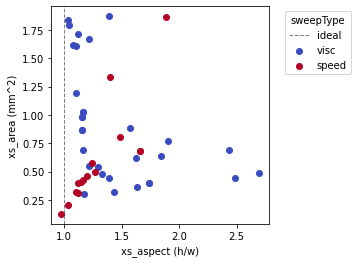

In [147]:
mp.scatterSS(ssmin, 'xs_aspect', 'xs_area', 'sweepType', logx=False, logy=False, gradColor=0, xideal=1, units=u, legend=True, dx=0, dy=0)

In [148]:
ssmin[(ssmin.xs_area>1.25)&(ssmin.date==210824)&(ssmin.sigma>0)][['bn', 'xs_aspect', 'ReRatio', 'xs_area']]

,bn,xs_aspect,ReRatio,xs_area
335,I_M6_S_3.00_VI_10_VS_2.5_210824,1.889309,76.441373,1.860734
154,I_M6_S_2.25_VI_5_VS_5_210824,1.040393,0.978946,1.793968
347,I_M6_S_3.00_VI_7.5_VS_2.5_210824,1.397807,48.880636,1.335283
158,I_M6_S_2.50_VI_5_VS_5_210824,1.102909,2.093372,1.606102


In [117]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [137]:
ss[ss.sweepType=='visc_0_high_v_ratio'][['bn', 'xs_area']]

,bn,xs_area
384,I_2.75_S_2.25_VI_10_VS_5_210921,NaN
385,I_2.75_S_2.50_VI_10_VS_5_210921,NaN
407,I_2.75_S_3.00_VI_10_VS_5_210921,NaN
408,I_2.75_S_3.50_VI_10_VS_5_210921,NaN
409,I_2.75_S_4.00_VI_10_VS_5_210921,NaN


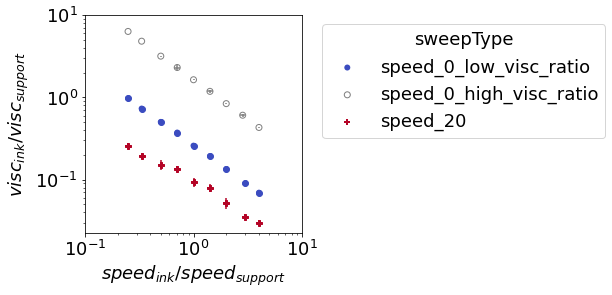

In [37]:
fig, ax=mp.scatterSS(ss[ss.sweepType.str.contains('speed')], 'vRatio', 'viscRatio', 'sweepType', logx=True, logy=True, dx=0, fontsize=18)
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_xticks([0.1, 1, 10])
ax.set_yticks([0.1, 1, 10])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.set_xlabel('$speed_{ink}/speed_{support}$')
ax.set_ylabel('$visc_{ink}/visc_{support}$')
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'vratio viscratio.png'), bbox_inches='tight', dpi=150)

In [142]:
sslap[sslap.xs_area>1]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst,sup_Ca,ink_Ca,ReProd,sweepType
432,I_3.50_S_2.50_VI_7.5_VS_2.5_210929,210929,0,0.603,0.907,True,True,0.580152,3.0,3.455614,...,NaN,NaN,NaN,NaN,NaN,3.318267e-07,inf,inf,5.445133e-07,speed_0_high_visc_ratio
411,I_3.50_S_2.50_VI_10_VS_2.5_210929,210929,0,0.603,0.907,True,True,0.438047,4.0,6.102181,...,5.067122e-09,0.065180,0.015461,0.001213,0.007717,3.559650e-07,inf,inf,9.615423e-07,speed_0_high_visc_ratio
384,I_2.75_S_2.25_VI_10_VS_5_210921,210921,0,0.603,0.907,True,True,0.319862,2.0,4.089694,...,1.005245e-07,0.000655,0.008212,0.000580,0.011453,2.040652e-05,inf,inf,4.392391e-05,visc_0_high_v_ratio


In [133]:
ss[(ss.ink_type=='mineral oil_Span 20')&(ss.sup_Ca<0.1)&(ss.xs_aspect>=1)][['bn', 'xs_aspect', 'xs_area']]

,bn,xs_aspect,xs_area
257,I_M4S_S_2.25T_210922,1.000000,0.005952
258,I_M4S_S_2.25T_211005,1.256376,2.674900
270,I_M5S_S_2.25T_211005,1.049303,2.383404
286,I_M6S_S_2.25T_211005,1.063001,1.030627
302,I_M7S_S_2.25T_211005,1.304435,1.279152
320,I_M8S_S_2.25T_211005,1.393422,1.526836
336,I_M9S_S_2.25T_211005,1.865755,1.763910


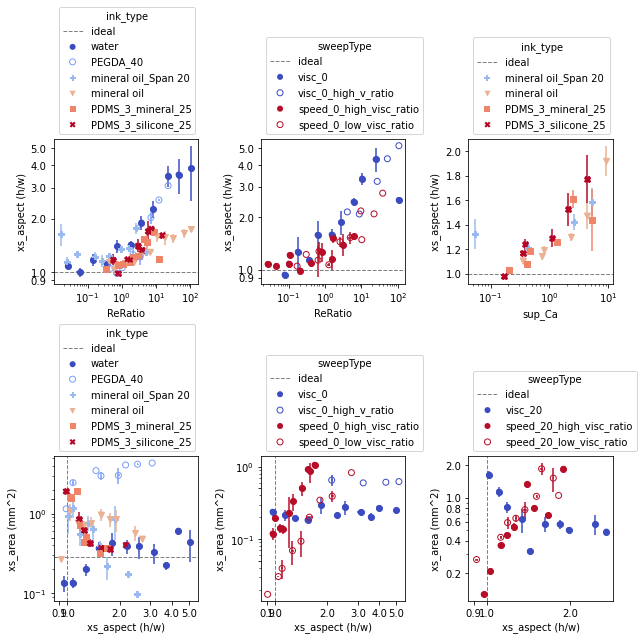

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [134]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
# ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(9,9))
mp.scatterSS(ss1[ss1.sweepType.str.contains('visc')], 'ReRatio', 'xs_aspect', 'ink_type', logx=True, logy=True, gradColor=0, yideal=1, ax=axs[0][0], units=u,  legend=True, fontsize=10)
mp.sweepTypeSS(sslap, 'ReRatio', 'xs_aspect', logx=True, logy=True, gradColor=0, yideal=1, ax=axs[0][1], units=u, legend=True)
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][2], units=u,  legend=True)
kwargs = {'logx':True, 'logy':True, 'gradColor':0, 'xideal':1, 'units':u, 'legend':True}
mp.scatterSS(ss0[ss0.sweepType.str.contains('visc')],'xs_aspect', 'xs_area',  'ink_type', yideal=(np.pi*(cfg.const.di/2)**2), ax=axs[1][0], **kwargs)
mp.sweepTypeSS(sslap, 'xs_aspect', 'xs_area', ax=axs[1][1], **kwargs)
mp.sweepTypeSS(ssmin, 'xs_aspect', 'xs_area', ax=axs[1][2], **kwargs)
fig.tight_layout()
# fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect.svg'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ee3dd54208>)

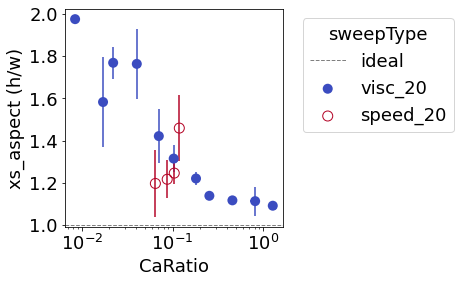

In [33]:
ss0['CaRatio'] = ss0['sup_CaInv']/ss0['ink_CaInv']
mp.scatterSS(ss0[ss0.sigma==20], 'CaRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, units=u, legend=True,  markersize=100, fontsize=18)

In [167]:
ssca[(ssca.sigma==2)&(ssca.xs_aspect>1.5)][['bn', 'ReRatio', 'xs_aspect', 'xs_aspect_SE']]

,bn,ReRatio,xs_aspect,xs_aspect_SE
287,I_M6S_S_3.00T_210518,2.145885,1.678102,0.275148
299,I_M7S_S_3.00T_210518,2.103998,1.976952,0.109837
311,I_M8S_S_3.00T_210518,1.802697,1.517450,0.065501
318,I_M9S_S_2.50T_210922,0.127702,1.816878,0.080250
285,I_M6S_S_2.75T_210922,1.081643,1.583429,0.193428
262,I_M4S_S_2.75T_210518,2.466636,2.230610,0.135299
263,I_M4S_S_2.75T_210922,2.466636,1.670088,0.078739
275,I_M5S_S_3.00T_210518,3.169731,2.517794,0.349691
276,I_M5S_S_3.00T_210922,3.169731,1.865874,0.036087


In [41]:
import matplotlib

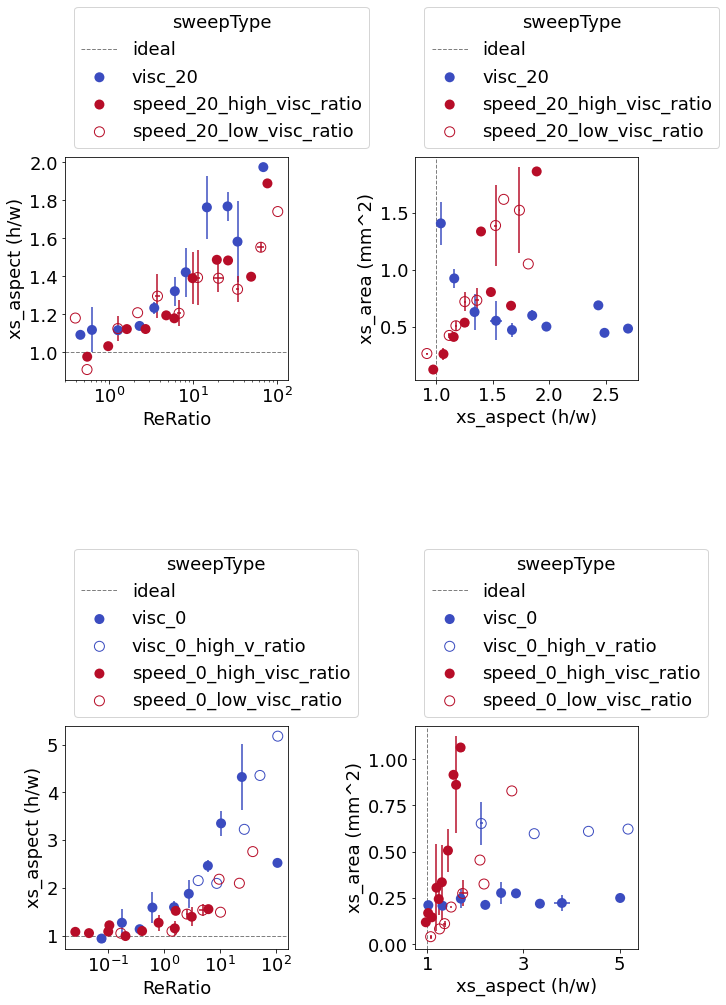

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

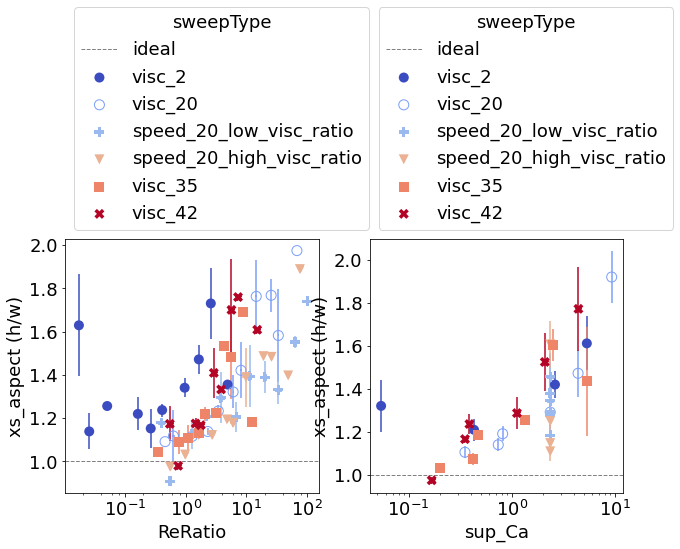

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
plt.rc('font', size=18) 
fig,axs = plt.subplots(2,2,figsize=(10,16))
mp.sweepTypeSS(ssmin, 'ReRatio', 'xs_aspect', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][0], units=u, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ssmin, 'xs_aspect', 'xs_area', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[0][1], units=u, legend=True, markersize=100, fontsize=18)
mp.sweepTypeSS(sslap, 'ReRatio', 'xs_aspect', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][0], units=u, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(sslap, 'xs_aspect', 'xs_area', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[1][1], units=u, legend=True, markersize=100, fontsize=18)
axs[0][0].set_xticks([1, 10, 100])
axs[1][0].set_xticks([0.1, 1, 10, 100])
axs[1][1].set_xticks([1,3,5])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'aspect_area_sweeps.svg'), bbox_inches='tight', dpi=300)
fig,axs = plt.subplots(1,2,figsize=(10, 6))
mp.scatterSS(ssca, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0], units=u, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u,  legend=True,  markersize=100, fontsize=18)
axs[0].set_xticks([0.1, 1, 10, 100])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
axs[0].xaxis.set_minor_locator(locmin)
axs[0].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
axs[1].set_xticks([0.1, 1, 10])
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'xs_aspect_nonzero.svg'), bbox_inches='tight', dpi=300)

In [50]:
ss[(ss.sigma==2)&(ss.sup_Ca<0.1)&(ss.xs_aspect>1.2)][['bn', 'xs_aspect', 'ReRatio', 'sup_Ca', 'sup_visc0']]

,bn,xs_aspect,ReRatio,sup_Ca,sup_visc0
258,I_M4S_S_2.25T_211005,1.256376,0.050289,0.05422,0.021688
304,I_M7S_S_2.25T_211005,1.304435,0.021622,0.05422,0.021688
322,I_M8S_S_2.25T_211005,1.393422,0.018525,0.05422,0.021688
338,I_M9S_S_2.25T_211005,1.865755,0.015803,0.05422,0.021688


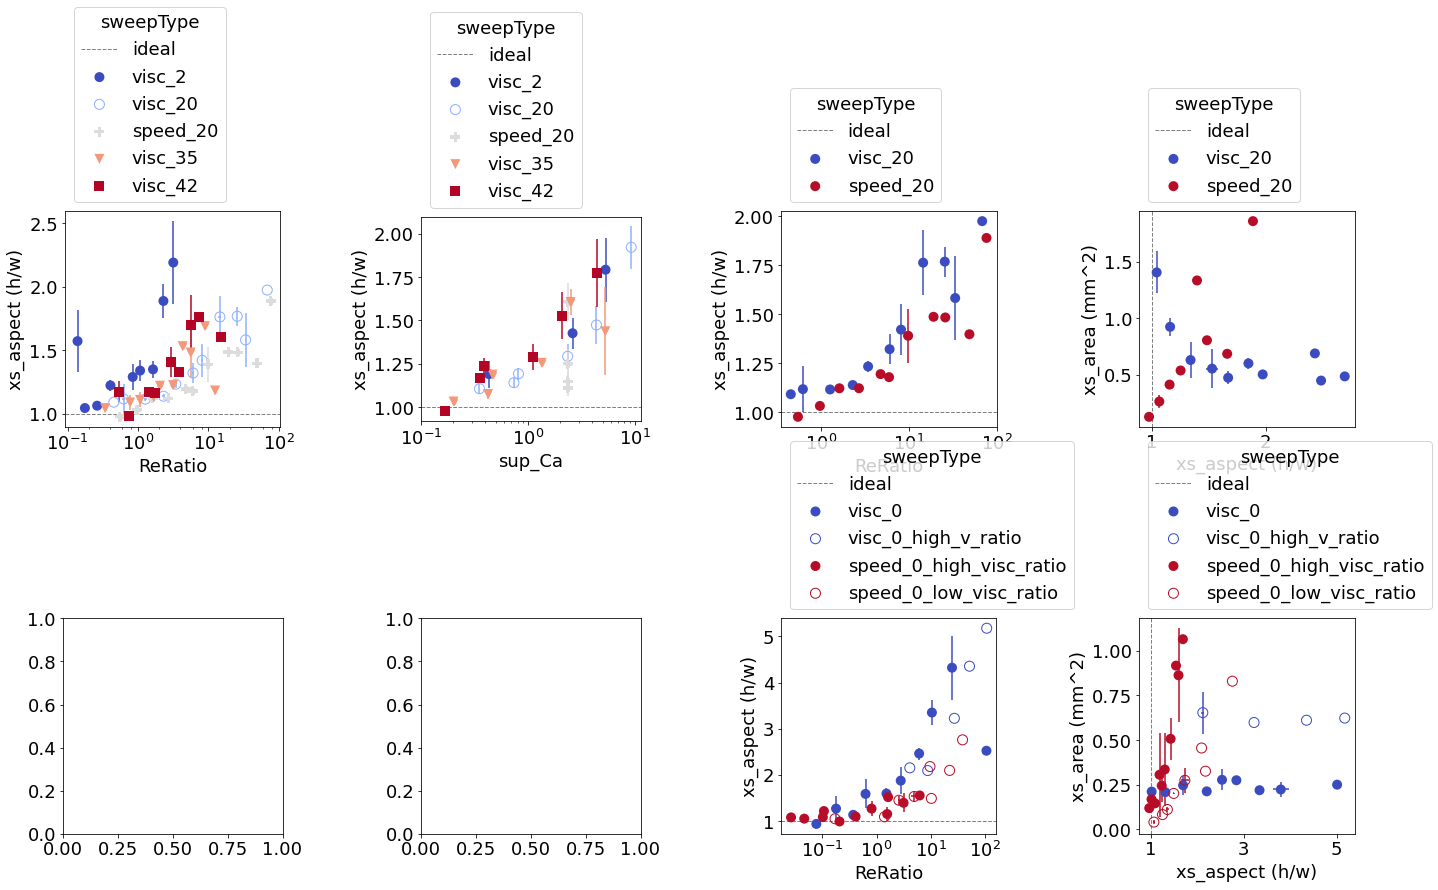

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [181]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
plt.rc('font', size=18) 
fig,axs = plt.subplots(2,4,figsize=(20, 12))
mp.scatterSS(ssca, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][0], units=u, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][1], units=u,  legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ssmin, 'ReRatio', 'xs_aspect', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][2], units=u, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ssmin, 'xs_aspect', 'xs_area', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[0][3], units=u, legend=True, markersize=100, fontsize=18)
mp.sweepTypeSS(sslap, 'ReRatio', 'xs_aspect', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][2], units=u, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(sslap, 'xs_aspect', 'xs_area', logx=False, logy=False, gradColor=0, xideal=1, ax=axs[1][3], units=u, legend=True, markersize=100, fontsize=18)
axs[0][0].set_xticks([0.1, 1, 10, 100])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
axs[0][0].xaxis.set_minor_locator(locmin)
axs[0][0].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
axs[0][1].set_xticks([0.1, 1, 10])
axs[0][2].set_xticks([1, 10, 100])
axs[1][2].set_xticks([0.1, 1, 10, 100])
axs[1][3].set_xticks([1,3,5])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'xs_aspect_nonzero.svg'), bbox_inches='tight', dpi=300)

In [177]:
ssca[ssca.sweepType=='speed_20'][['ReRatio', 'xs_aspect', 'sup_Ca', 'sup_v', 'sup_visc0']]

,ReRatio,xs_aspect,sup_Ca,sup_v,sup_visc0
448,48.880636,1.397807,2.354427,2.5,18.835419
447,3.052462,1.148915,2.352441,10.0,4.704881
446,2.884927,1.100889,2.352853,7.5,6.274274
445,6.492690,1.160964,2.353434,5.0,9.413735
444,25.981723,1.483436,2.354427,2.5,18.835419
443,1.622487,1.122008,2.352441,10.0,4.704881
442,0.973640,1.031961,2.352853,7.5,6.274274
441,2.191232,1.116922,2.353434,5.0,9.413735
440,8.768627,1.662879,2.354427,2.5,18.835419
439,0.547577,0.976338,2.352441,10.0,4.704881


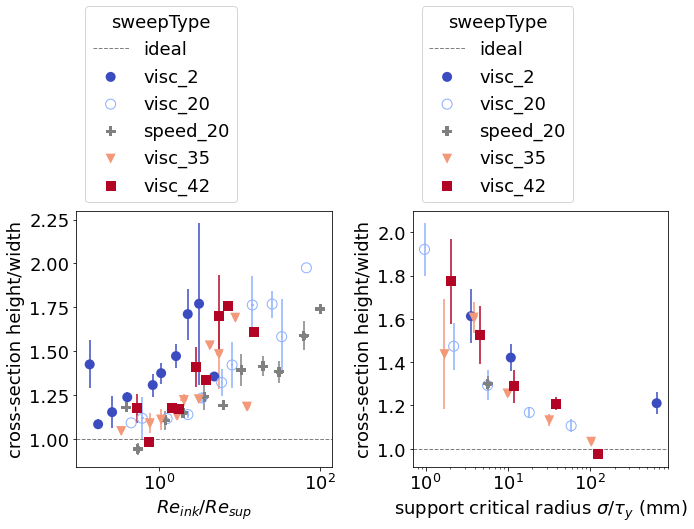

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
fig,axs = plt.subplots(1,2,figsize=(10,10))
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
mp.scatterSS(ssca, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[0],  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_rPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[1], markersize=100, fontsize=18)
axs[0].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[0].set_ylabel('cross-section height/width')
axs[1].set_ylabel('cross-section height/width')
axs[1].set_xlabel('support critical radius $\sigma/{\\tau}_y$ (mm)')
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'rcrit.svg'), bbox_inches='tight', dpi=300)

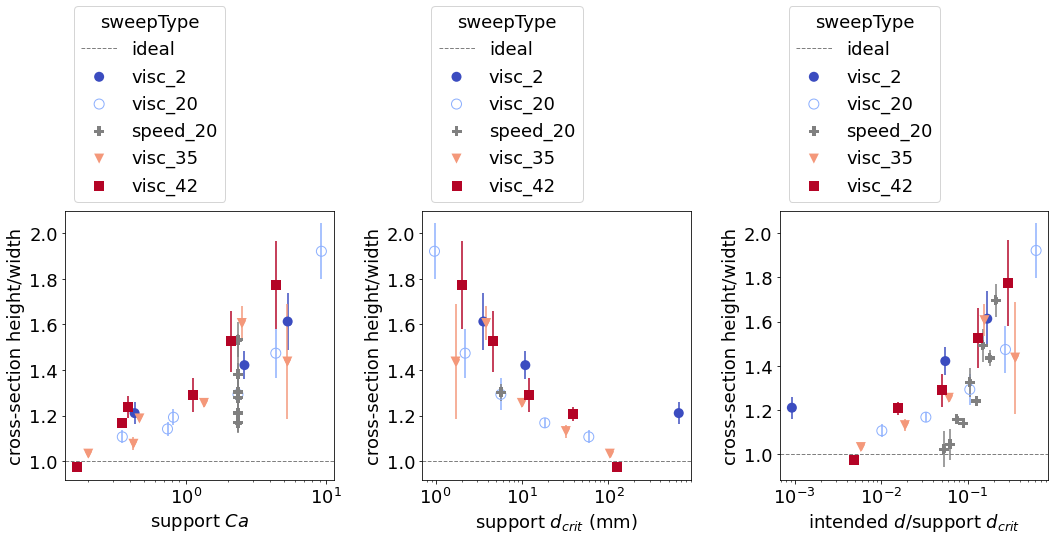

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [25]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
fig,axs = plt.subplots(1,3,figsize=(15,10))
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[0],  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_rPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[1], markersize=100, fontsize=18)
ssca['dEst/dPR'] = ssca['dEst']/ssca['sup_rPR']
mp.scatterSS(ssca, 'dEst/dPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[2], markersize=100, fontsize=18)

axs[0].set_xlabel('support $Ca$')
axs[0].set_ylabel('cross-section height/width')
axs[1].set_ylabel('cross-section height/width')
axs[2].set_ylabel('cross-section height/width')
axs[1].set_xlabel('support $d_{crit}$ (mm)')
axs[2].set_xlabel('intended $d$/support $d_{crit}$')
fig.tight_layout()

(<Figure size 432x288 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ec94e9d508>)

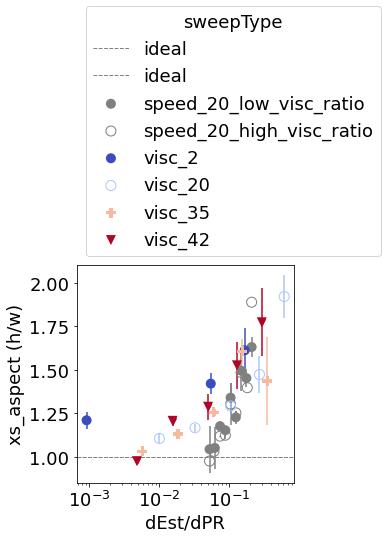

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
ssca['dEst/dPR'] = ssca['dEst']/ssca['sup_rPR']
fig,axs = plt.subplots(1,1)
mp.scatterSS(ssca[ssca.sweepType.str.contains('speed')], 'dEst/dPR', 'xs_aspect', 'sweepType', logx=False, logy=False, gradColor=0, ax=axs, yideal=1,units=u,  legend=True,  markersize=100, fontsize=18, color='gray')
mp.scatterSS(ssca[ssca.sweepType.str.startswith('visc_')], 'dEst/dPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs, yideal=1, units=u,  legend=True, markersize=100, fontsize=18)

2.0 [-0.0, 2.0]
2.0 [-0.0, 2.0]
2.0 [-0.0, 2.0]
3.0 [-1.0, 2.0]


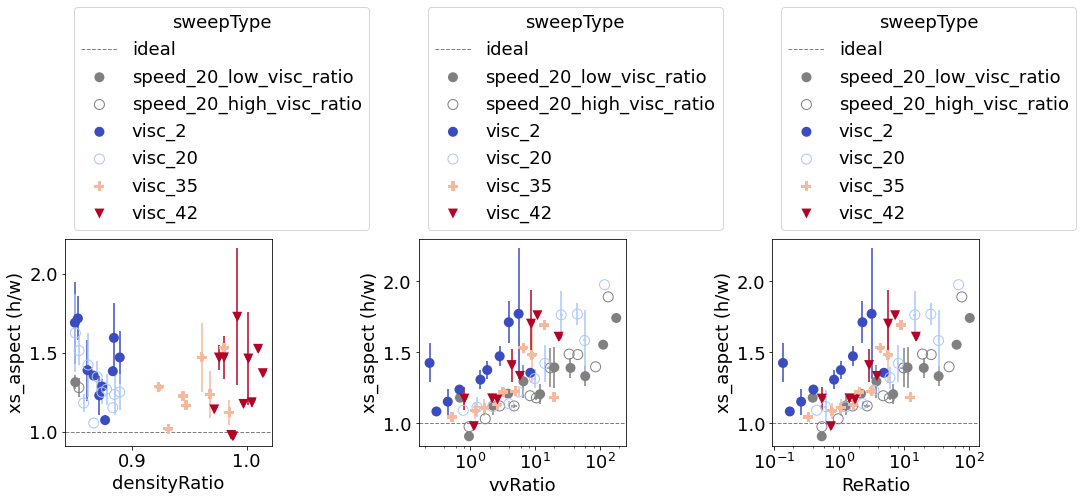

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [62]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
ssca['densityRatio'] = ssca['ink_density']/ssca['sup_density']
ssca['vvRatio'] = ssca['vRatio']/ssca['viscRatio']
fig,axs = plt.subplots(1,3, figsize=(15,10))
for i,s in enumerate(['densityRatio', 'vvRatio', 'ReRatio']):
    mp.scatterSS(ssca[ssca.sweepType.str.contains('speed')], s, 'xs_aspect', 'sweepType', logx=(i>0), logy=False, gradColor=0, ax=axs[i], yideal=1,units=u,  legend=True,  markersize=100, fontsize=18, color='gray')
    mp.scatterSS(ssca[ssca.sweepType.str.startswith('visc_')], s, 'xs_aspect', 'sweepType', logx=(i>0), logy=False, gradColor=0, ax=axs[i],units=u,  legend=True, markersize=100, fontsize=18)
fig.tight_layout()
# axs.set_xticks([0.85, 0.95, 1.05])
# axs.set_xticklabels([0.85, 0.95, 1.05])

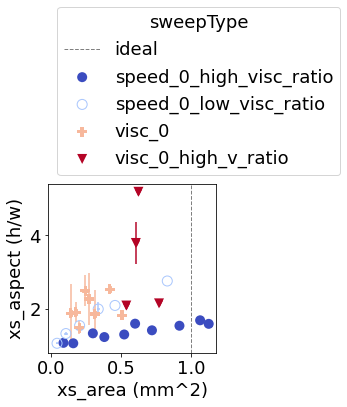

<Figure size 432x288 with 0 Axes>

In [170]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
plt.rc('font', size=18) 
fig,axs = plt.subplots(1,1,figsize=(6,6))
sslap.sort_values(by='sweepType', inplace=True, ascending=True)
mp.scatterSS(sslap, 'xs_area', 'xs_aspect', 'sweepType', logx=False, logy=False, gradColor=0, xideal=1, ax=axs, units=u, legend=True,  markersize=100, fontsize=18)
fig.tight_layout()

In [63]:
cmap(0.99)

(0.717434544917647, 0.05111754842352939, 0.15873660770196077, 1.0)

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


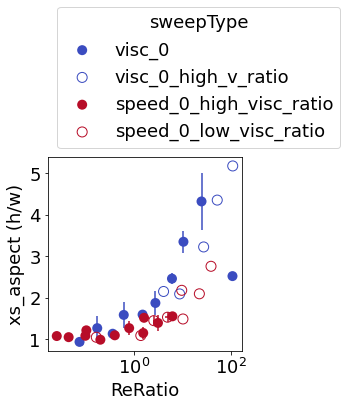

<Figure size 432x288 with 0 Axes>

In [168]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
sslap.date = sslap.date.replace(210921, 210824)
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
plt.rc('font', size=18) 
fig,axs = plt.subplots(1,1,figsize=(6,6))
mp.sweepTypeSS(sslap, 'ReRatio', 'xs_aspect', logx=True, logy=False, gradColor=0, ax=axs, units=u, legend=True,  markersize=100, fontsize=18)
fig.tight_layout()
# fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 're_consolidate.svg'), bbox_inches='tight', dpi=120)

In [81]:
sslap2[sslap2.viscRatio>3]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_maxlenN_SE,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst,sup_Ca,sweepType
32,I_4.00_S_2.25_210727,210727,0,0.603,0.907,True,True,8.643210,1.0,0.077445,...,0.161137,0.149033,0.009416,0.134384,0.029824,0.000657,0.002991,0.482388,inf,visc_0
26,I_3.50_S_2.25_210727,210727,0,0.603,0.907,True,True,3.497022,1.0,0.187797,...,0.026807,0.026807,0.002371,0.197641,0.025571,0.000449,0.038840,0.318694,inf,visc_0
33,I_4.00_S_2.50_210727,210727,0,0.603,0.907,True,True,4.112881,1.0,0.165607,...,0.312885,0.600695,0.005774,0.230607,0.042160,0.001205,0.006663,0.450928,inf,visc_0
34,I_4.00_S_2.75_210727,210727,0,0.603,0.907,True,True,3.728383,1.0,0.182487,...,0.275211,0.275211,0.287450,0.469558,0.139564,0.001279,0.002675,1.355334,inf,visc_0


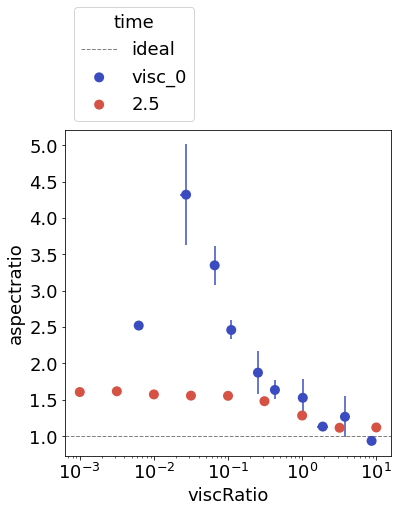

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [75]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,1,figsize=(6,6))
sslap2 = sslap[sslap.sweepType=='visc_0']
mp.scatterSS(sslap2, 'viscRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs, units=u, legend=True, color=cmap(0), fontsize=18, markersize=100)
ss0s = sims.copy()
sslap = sims.copy()
sslap = sslap[(sslap.sigma==0)&(sslap.tau0ink==0)&(sslap.tau0sup==0)]
mp.scatterSS(sslap, 'viscRatio', 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs, units=usim, legend=True,  fontsize=18, color=cmap(0.9), markersize=100)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=120)

In [21]:
sims.keys()

Index(['folder', 'ink', 'nuink', 'tau0ink', 'kink', 'nink', 'rhoink', 'sup',
       'nusup', 'tau0sup', 'ksup', 'nsup', 'rhosup', 'sigma', 'nozzleAngle',
       'vink', 'vsup', 'dsup', 'dink', 'gdot_ink', 'visc0_ink', 'CaInv_ink',
       'Re_ink', 'gdot_sup', 'visc0_sup', 'CaInv_sup', 'Re_sup', 'viscRatio',
       'ReRatio', 'x', 'xbehind', 'time', 'centery', 'centerz', 'area',
       'maxheight', 'maxwidth', 'centeryn', 'centerzn', 'arean', 'maxheightn',
       'maxwidthn', 'vertdisp', 'vertdispn', 'aspectratio', 'speed',
       'speeddecay'],
      dtype='object')

In [46]:
sslap[['visc0_ink', 'visc0_sup', 'tau0sup','viscRatio', 'aspectratio']]

,visc0_ink,visc0_sup,tau0sup,viscRatio,aspectratio
111,1.000000,1.00,0,1.000000,1.266297
113,1.000000,10.00,0,0.100000,1.553339
115,1.000000,100.00,0,0.010000,1.582360
117,10.000000,1.00,0,10.000000,1.112382
119,10.000000,10.00,0,1.000000,1.271427
121,10.000000,100.00,0,0.100000,1.555222
123,10.000000,1000.00,0,0.010000,1.575203
124,100.000000,10000.00,0,0.010000,1.563268
126,1000.000000,10000.00,0,0.100000,1.550596
128,10000.000000,10000.00,0,1.000000,1.271018


(<Figure size 432x288 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c962588848>)

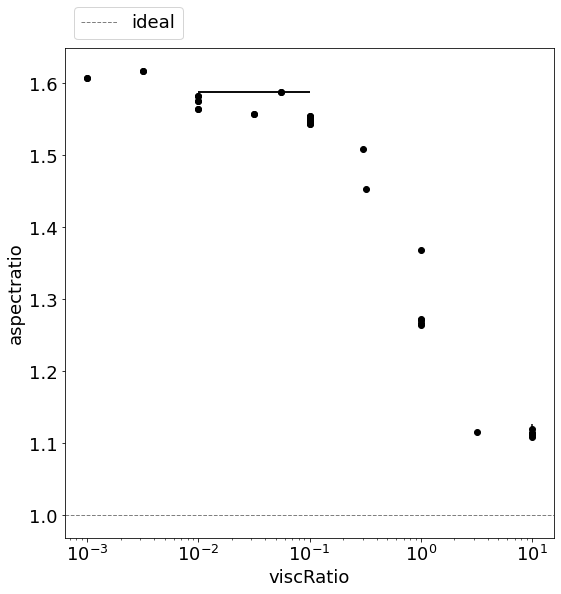

<Figure size 432x288 with 0 Axes>

In [38]:
ss0 = sims.copy()
sslap = ss0.copy()
sslap = sslap[(sslap.sigma==0)&(sslap.tau0ink==0)&(sslap.tau0sup==0)]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,1,figsize=(9,9))
mp.scatterSS(sslap, 'viscRatio', 'aspectratio', '', logx=True, logy=False, gradColor=0, yideal=1, ax=axs, units=usim, legend=True, color=cmap(0), fontsize=18, dx=0, dy=0)
# fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=300)

In [24]:
sslap[(sslap.vRatio<0.4)&(sslap.sweepType=='speed_0_low_visc_ratio')][['bn', 'vRatio', 'xs_aspect']]

,bn,vRatio,xs_aspect
390,I_2.75_S_2.75_VI_2.5_VS_10_210824,0.250000,1.605556
391,I_2.75_S_2.75_VI_2.5_VS_10_210921,0.250000,1.047880
396,I_2.75_S_2.75_VI_2.5_VS_7.5_210824,0.333333,1.894758
397,I_2.75_S_2.75_VI_2.5_VS_7.5_210921,0.333333,1.223298


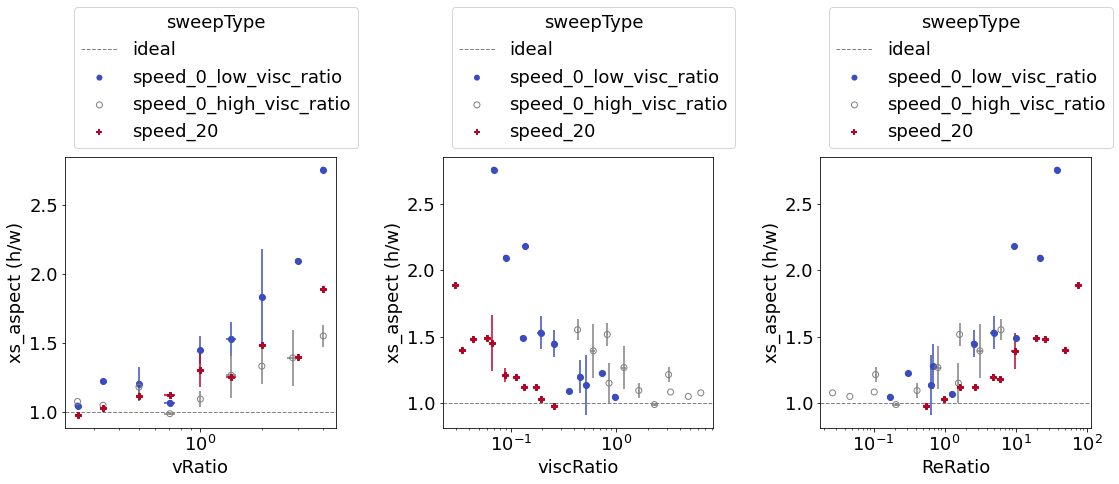

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
ss0 = ss.copy()
ss0 = ss0[(ss0.bn!='I_2.75_S_2.75_VI_2.5_VS_10_210824')&(ss0.bn!='I_2.75_S_2.75_VI_2.5_VS_7.5_210824')]
sslap = ss0.copy()
sslap = sslap[sslap.sweepType.str.contains('speed')]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,3,figsize=(16, 8))
mp.scatterSS(sslap, 'vRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0], units=u, legend=True, fontsize=18)
mp.scatterSS(sslap, 'viscRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u, legend=True, fontsize=18)
mp.scatterSS(sslap, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=True, fontsize=18)
fig.tight_layout()

(<Figure size 432x288 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124780d7988>)

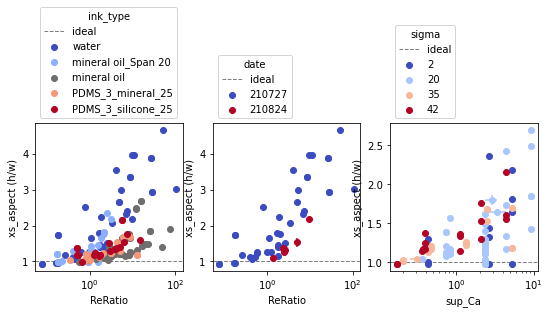

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [128]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
sslap = ss1[ss1.ink_base=='water']
ssca = ss1[ss1.sigma>0]
ssmin = ss1[ss1.sigma==20]

fig,axs = plt.subplots(1,3,figsize=(9,5))
mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0], units=u, legend=True, dx=0, dy=0)
mp.scatterSS(sslap, 'ReRatio', 'xs_aspect', 'date', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u, legend=True, dx=0, dy=0)
mp.scatterSS(ssca, 'sup_Ca', 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=True, dx=0, dy=0)

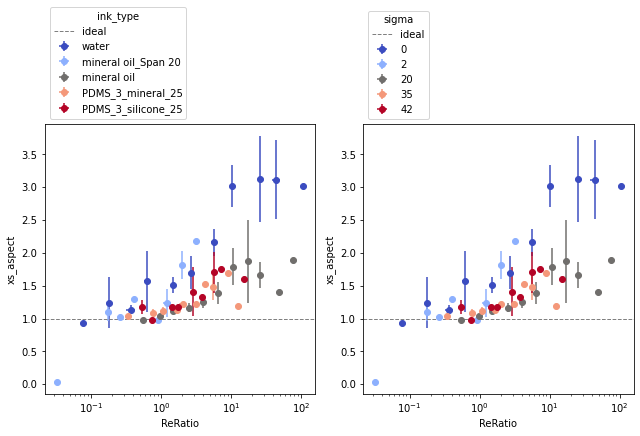

In [729]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_type!='PEGDA_40']
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
fig, axs = plt.subplots(1,2,figsize=(9,6))
for i,s in enumerate(['ink_type', 'sigma']):
    mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', s, logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1, fig=fig,ax=axs[i])
fig.tight_layout()

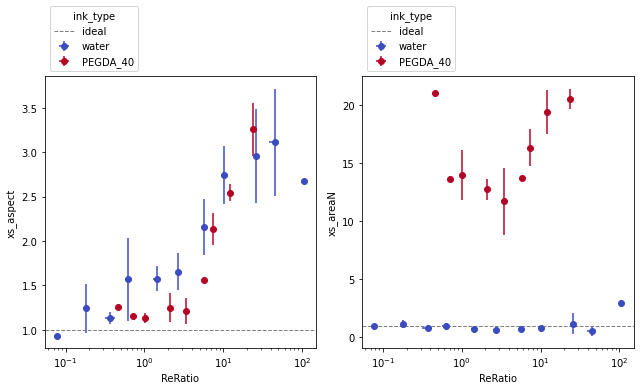

In [373]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
fig, axs = plt.subplots(1,2,figsize=(9,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN']):
    mp.scatterSS(ss1, 'ReRatio', s, 'ink_type', logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', yideal=1, fig=fig,ax=axs[i])
fig.tight_layout()

In [ ]:
ss1[ss1.ink_val]==13.5

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e6a54f48>)

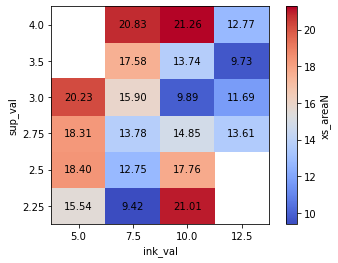

In [402]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_type=='PEGDA_40']
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
mp.colorMeshSS(ss1, 'ink_val', 'sup_val', 'xs_areaN', logx=False, logy=False, dx=0, dy=0, cmapname='coolwarm')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e85001c8>)

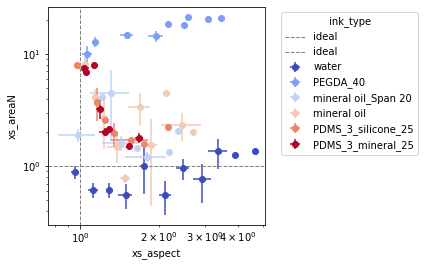

In [467]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.scatterSS(ss1, 'xs_aspect', 'xs_areaN', 'ink_type', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=1)

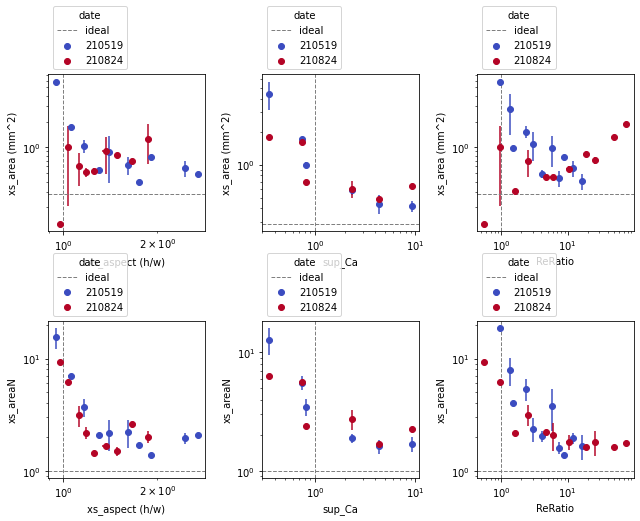

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [69]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma==20]
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(2,3, figsize=(9,7))
for j,yvar in enumerate(['xs_area', 'xs_areaN']):
    for i, xvar in enumerate(['xs_aspect', 'sup_Ca', 'ReRatio']):
        mp.scatterSS(ss1, xvar, yvar, 'date', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=([(np.pi*(cfg.const.di/2)**2), 1][j]), ax=axs[j][i], units=u)
fig.tight_layout()

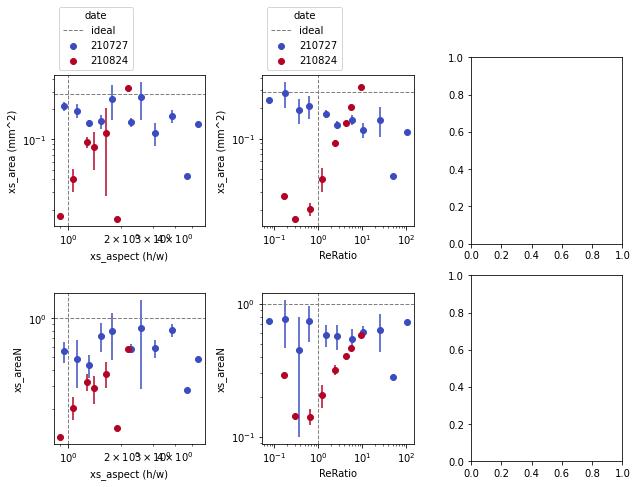

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [68]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma==0]
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(2,3, figsize=(9,7))
for j,yvar in enumerate(['xs_area', 'xs_areaN']):
    for i, xvar in enumerate(['xs_aspect', 'ReRatio']):
        mp.scatterSS(ss1, xvar, yvar, 'date', logx=True, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=([(np.pi*(cfg.const.di/2)**2), 1][j]), ax=axs[j][i], legend=(j==0), units=u)
fig.tight_layout()

In [44]:
ss1[(ss1.sigma==0)&(ss1.xs_aspect<2)&(ss1.xs_aspect>1.5)&(ss1.xs_area<0.5)][['bn','xs_aspect','xs_area']]

,bn,xs_aspect,xs_area
325,I_2.75_S_2.75_VI_2.5_VS_10_210824,1.605556,0.027121
37,I_4.00_S_4.00_210727,1.762061,0.117993
327,I_2.75_S_2.75_VI_2.5_VS_7.5_210824,1.894758,0.016019
332,I_2.75_S_2.75_VI_7.5_VS_5_210824,1.654503,0.204027
14,I_2.75_S_2.75_210727,1.513220,0.131088
34,I_4.00_S_2.75_210727,1.733885,0.443287
12,I_2.75_S_2.25_210727,1.646749,0.196988
7,I_2.50_S_2.50_210727,1.794172,0.200080


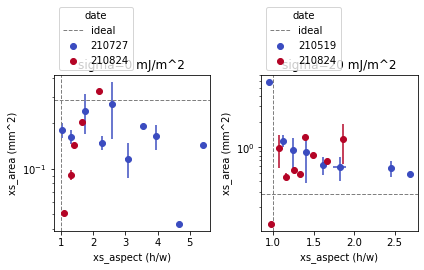

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_area>0.03]
ss1 = ss1[ss1.ink_base!='PEGDA_40']
# ss1 = ss1[ss1.xs_aspect_SE<1]
# ss1 = ss1[ss1.xs_aspect>0.5]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
fig,axs = plt.subplots(1,2, figsize=(6,4))
for j,sigma in enumerate([0,20]):
    ss2 = ss1[ss1.sigma==sigma]
    mp.scatterSS(ss2, 'xs_aspect', 'xs_area', 'date', logx=False, logy=True, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm', xideal=1, yideal=(np.pi*(cfg.const.di/2)**2), ax=axs[j], units=u)
    axs[j].set_title(f'sigma={sigma} mJ/m^2')
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4fb071ac8>)

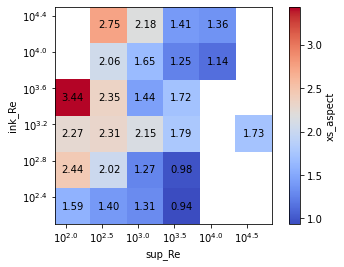

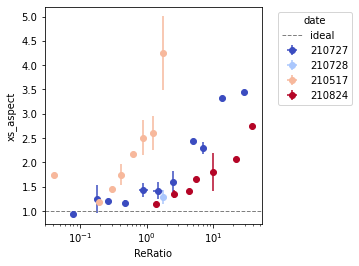

In [730]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1[ss1.ink_val>2.50]
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')
mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'date', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

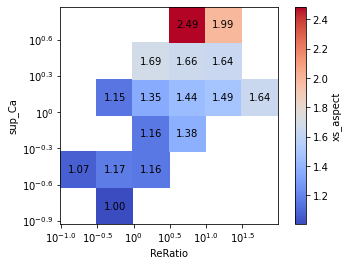

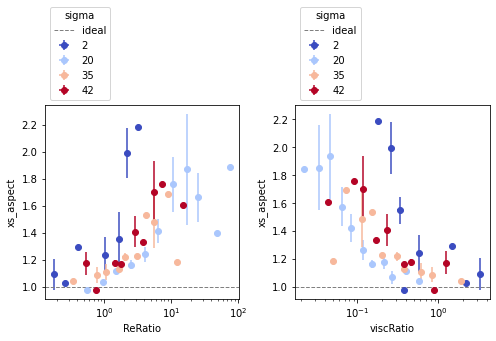

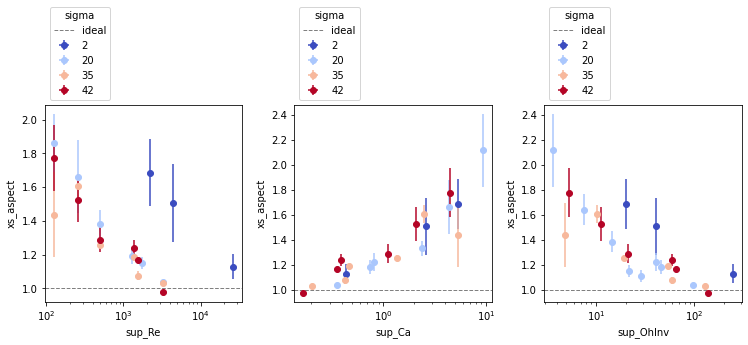

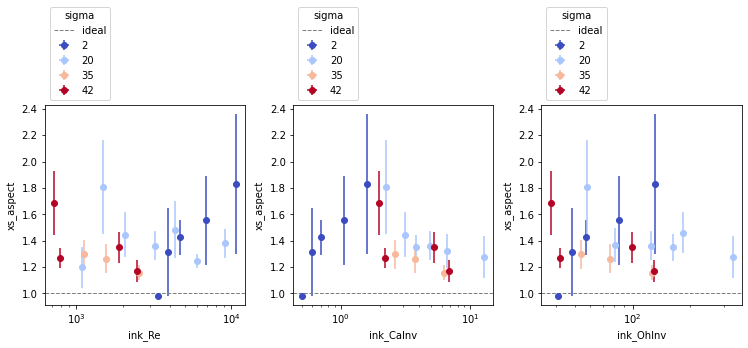

In [51]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.colorMeshSS(ss1, 'ReRatio', 'sup_Ca', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')
for l in [['ReRatio', 'viscRatio'],['sup_Re', 'sup_Ca', 'sup_OhInv'],['ink_Re', 'ink_CaInv', 'ink_OhInv']]:
    fig,axs = plt.subplots(1,len(l), figsize=(3.5*len(l),5))
    for i,st in enumerate(l):
        mp.scatterSS(ss1, st, 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1,fig=fig, ax=axs[i])
    fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4e1a34248>)

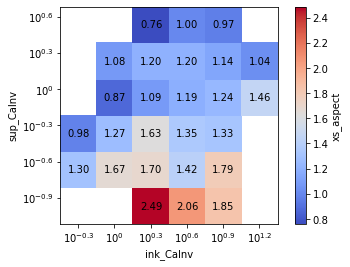

In [308]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.xs_aspect>0.5]
mp.colorMeshSS(ss1, 'ink_CaInv', 'sup_CaInv', 'xs_aspect', logx=True, logy=True,  dx=0.2, dy=0.2, cmapname='coolwarm')

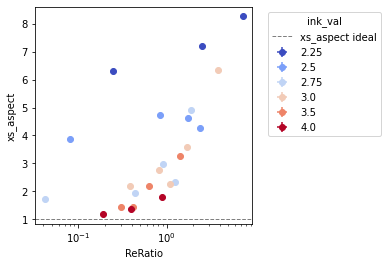

In [217]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==3]
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
fig,ax = mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'ink_val', logx=True, logy=False, gradColor=False,  dx=0, dy=1, cmapname='coolwarm', yideal=1)

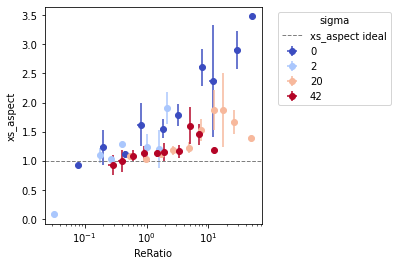

In [228]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
fig,ax = mp.scatterSS(ss1, 'ReRatio', 'xs_aspect', 'sigma', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

### area

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4d57baa88>)

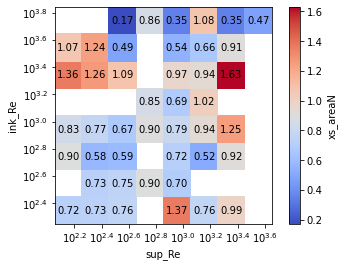

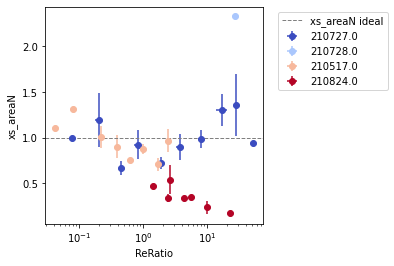

In [170]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['ReRatio'] = ss1['ink_Re']/ss1['sup_Re']
ss1['vratio'] = ss1['ink_v']/ss1['sup_v']
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'xs_areaN', logx=True, logy=True,  dx=0.1, dy=0.1, cmapname='coolwarm')
mp.scatterSS(ss1, 'ReRatio', 'xs_areaN', 'date', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dddf326d08>)

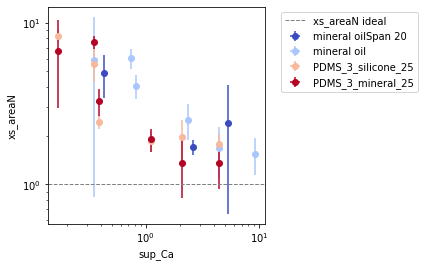

In [886]:
ss1 = ss.copy()
ss1 = ss1[ss1.calibFile]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.scatterSS(ss1, 'sup_Ca', 'xs_areaN', 'ink_type', logx=True, logy=True, gradColor=False, dx=0, dy=1, cmapname='coolwarm', yideal=1)

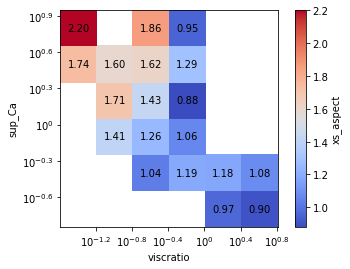

In [890]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_aspect', logx=True, logy=True, dx=0.18, dy=0.18)

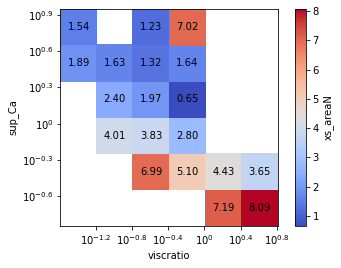

In [891]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_areaN', logx=True, logy=True, dx=0.18, dy=0.18)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddd338bfc8>)

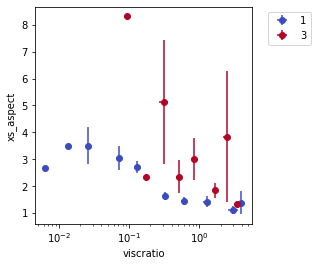

In [706]:
ss1 = ss.copy()
ss1 = ss[ss.calibFile]
ss1.date = [float(i[0:6]) for i in ss1.date]
ss1 = ss1[ss1.date>210516]
ss1 = ss1[ss1.ink_base=='water']
mp.scatterSS(ss1, 'viscratio', 'xs_aspect', 'ink_days', logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddcf8c0cc8>)

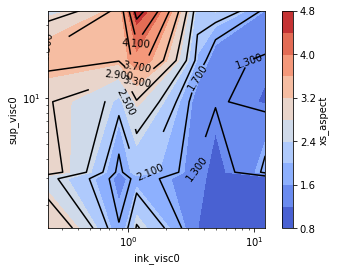

In [741]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
mp.contourSS(ss1, 'ink_visc0', 'sup_visc0', 'xs_aspect', logx=True, logy=True)

### yshift

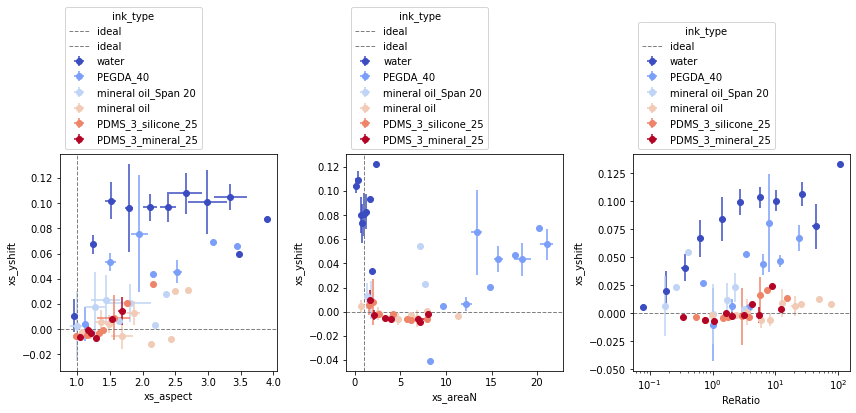

In [470]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_yshift', 'ink_type', **kwargs)
fig.tight_layout()

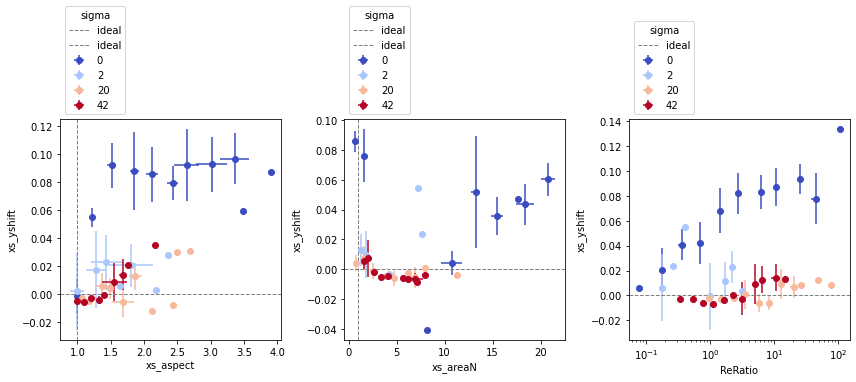

In [489]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_yshift', 'sigma', **kwargs)
fig.tight_layout()

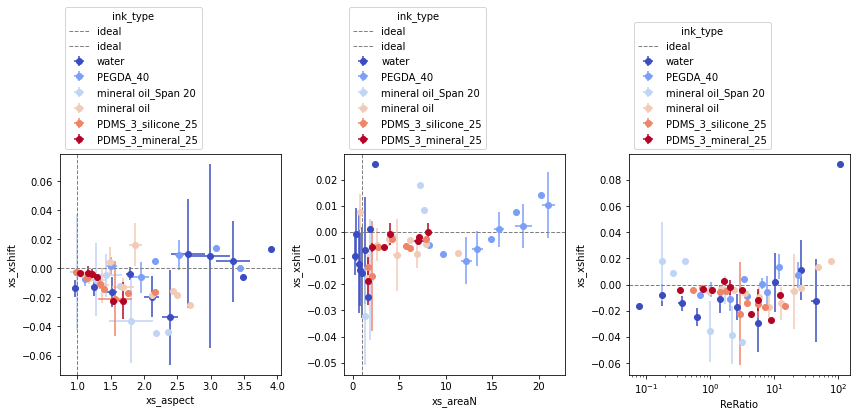

In [468]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate(['xs_aspect', 'xs_areaN','ReRatio']):
    kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'ax':axs[i], 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1, s, 'xs_xshift', 'ink_type', **kwargs)
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4ea8f7d48>)

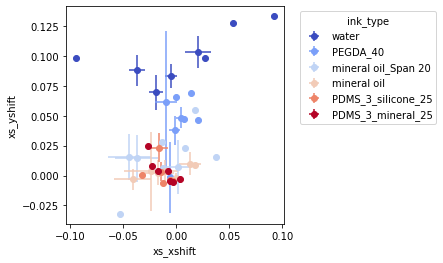

In [472]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1[ss1.xs_yshift_SE<0.05]
ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
mp.scatterSS(ss1, 'xs_xshift', 'xs_yshift', 'ink_type')

In [460]:
ss[(ss.ink_type=='PDMS_3_mineral_25')&(ss.xs_aspect<1)&(ss.xs_yshift<1)][['bn', 'xs_areaN', 'xs_yshift', 'xs_aspect']]

,bn,xs_areaN,xs_yshift,xs_aspect
274,I_PDMSM12.5_S_3.00_210630,1.371098,0.011839,0.867871
275,I_PDMSM12.5_S_3.50_210630,0.675217,-0.004263,0.880221
276,I_PDMSM12.5_S_4.00_210630,0.674329,-0.007345,0.869414
281,I_PDMSM7.5_S_2.25_210630,5.681467,0.011418,0.960331
